**Описание источников данных:**

train.csv - пары "заявка - целевая переменная", для этой выборки нужно собрать признаки и обучить модель;

test.csv - пары "заявки - прогнозное значение", для этой выборки нужно собрать признаки и построить прогнозы;

bki.csv - данные БКИ о предыдущих кредитах клиента;

client_profile.csv - клиентский профиль, некоторые знания, которые есть у компании о клиенте;

payments.csv - история платежей клиента;

applications_history.csv - история предыдущих заявок клиента.

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import pickle

from utils.BuildDataset import build_raw_dataset
pd.set_option('display.max_columns', None)
from utils.feature_generators import encode_labels

In [2]:
def get_input(data_path: str,
              base_path = "raw_data") -> pd.DataFrame:
    """
    Считывание данных и вывод основной информации о наборе данных.

    Parameters
    ----------
    data_path: str
        Название файла.

    Returns
    -------
    data: pandas.core.frame.DataFrame
        Загруженный набор данных в pandas.DataFrame

    """
    
    data = pd.read_csv(f"{base_path}/{data_path}")
    data.columns = [col.lower() for col in data.columns]
    print(f"{data_path}: shape = {data.shape[0]} rows, {data.shape[1]} cols")

    return data

In [28]:
###########
# Settings
###########

# raw_data_path = 'raw_data/'

# Load all raw data
train = get_input("train.csv")
test = get_input("test.csv")
history = get_input("applications_history.csv")
client_profile = get_input("client_profile.csv")
payments = get_input("payments.csv")
bki = get_input("bki.csv")
# bki = pd.read_csv(raw_data_path + 'bki.csv', encoding='utf-8')
# client_profile = pd.read_csv(raw_data_path + 'client_profile.csv', encoding='utf-8')
# payments = pd.read_csv(raw_data_path + 'payments.csv')
# history = pd.read_csv(raw_data_path + 'applications_history.csv', encoding='utf-8')

# Merged on left data

# train_path = dataset_path + 'train.pkl'
# test_path = dataset_path + 'test.pkl'


# Load data
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

# with open(train_path, 'rb') as f:
#     train = pickle.load(f)

# with open(test_path, 'rb') as f:
#     test = pickle.load(f)


# TARGET = "TARGET"
# ALL_NUMERICAL_FEATS = train.select_dtypes(include=[np.number]).columns
# NUMERICAL_FEATS = ALL_NUMERICAL_FEATS.drop(TARGET)
# CAT_FEATS = train.select_dtypes(include='object').columns

In [5]:
train.shape, test.shape

((110093, 3), (165141, 2))

In [6]:
categorical = history.copy().select_dtypes(include="object")

In [7]:
categorical

,name_contract_type,name_contract_status,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,name_yield_group
0,NaN,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,middle
1,Cash,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,low_action
2,Cash,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,high
3,Cash,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,middle
4,Cash,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,high
...,...,...,...,...,...,...,...,...,...,...
1670209,NaN,Approved,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,low_normal
1670210,NaN,Approved,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,middle
1670211,NaN,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,low_normal
1670212,Cash,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,low_normal


In [8]:
categorical[:2]

,name_contract_type,name_contract_status,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,name_yield_group
0,NaN,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,middle
1,Cash,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,low_action


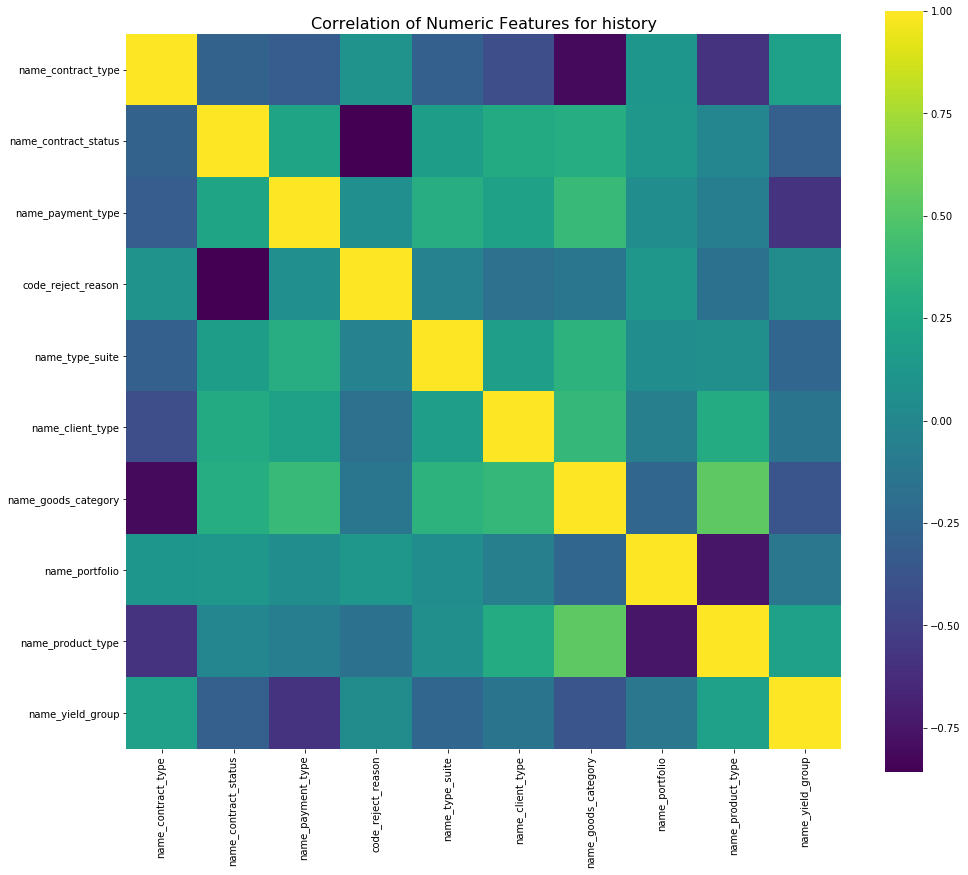

In [20]:
categorical = history.copy().select_dtypes(include="object")
categorical = encode_labels(categorical)
correlation = categorical.corr()

fig, axes = plt.subplots(figsize = (16,14))
plt.title("Correlation of Categorical Features for history", y=1, size=16)
sns.heatmap(correlation, square=True, cmap="viridis")

In [ ]:
history

In [ ]:
test.NAME_CONTRACT_TYPE.value_counts()

# Applications_history

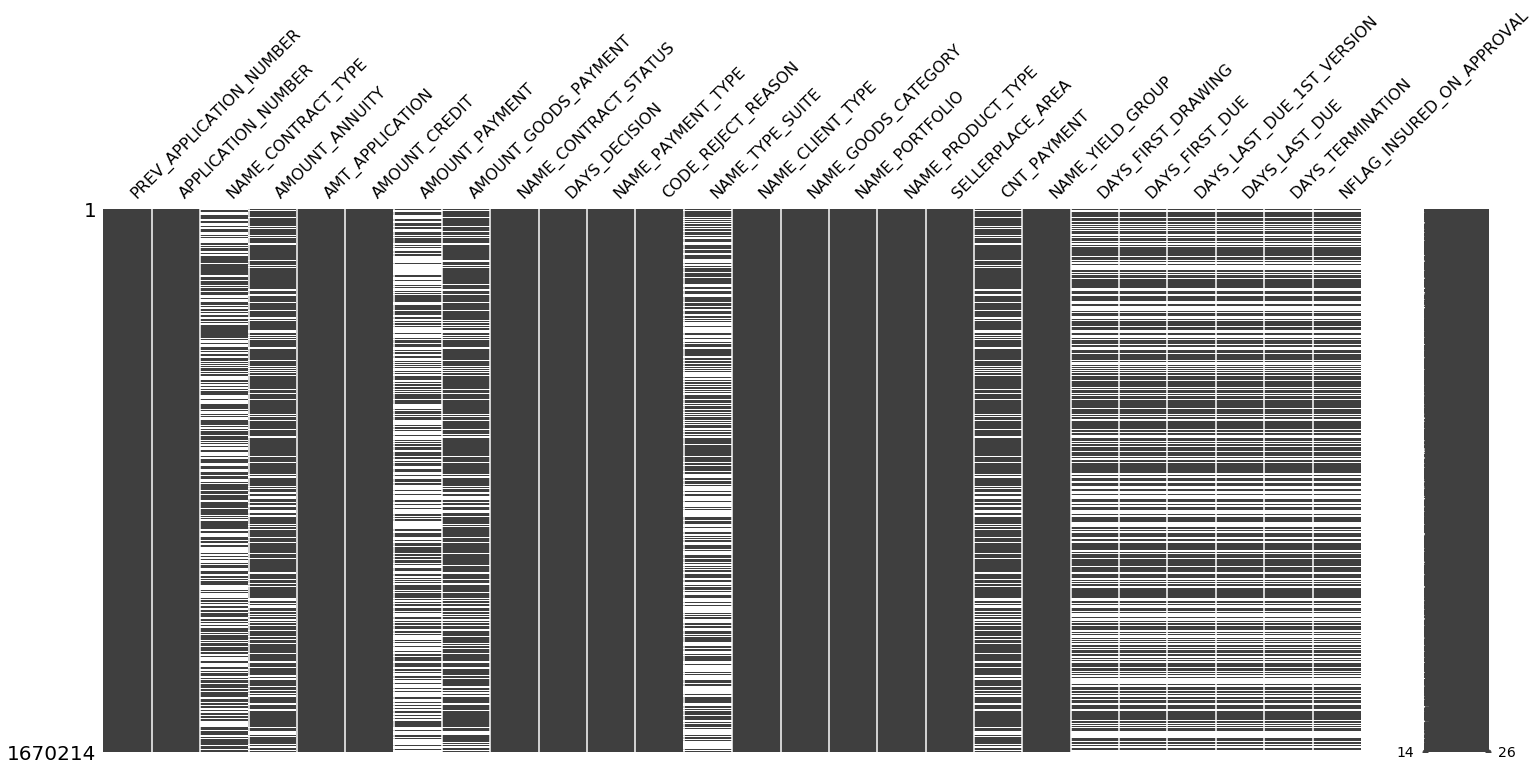

In [4]:
msno.matrix(history)

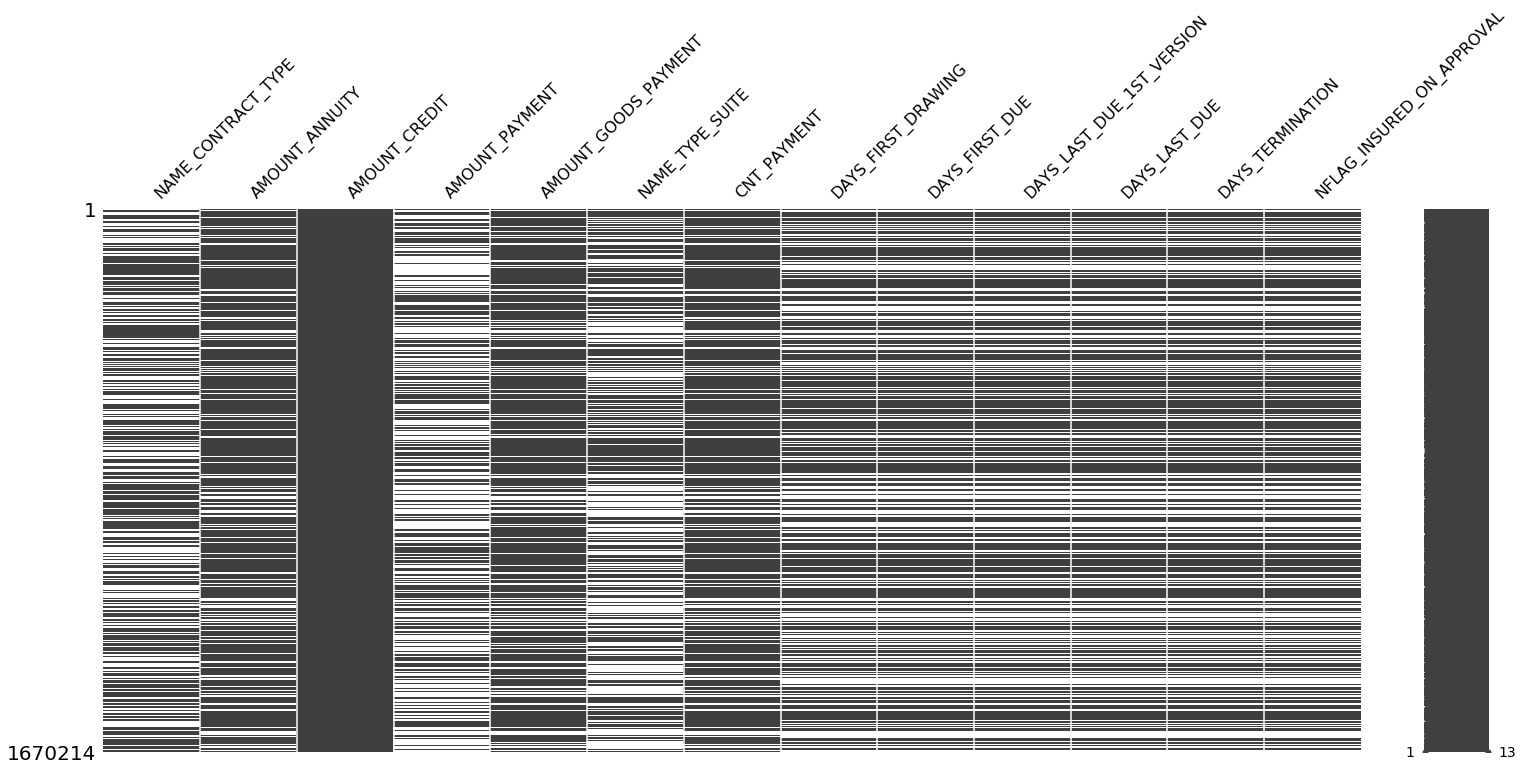

In [5]:
history_nan_cols =  history.columns[history.isna().any()].tolist()
msno.matrix(history[history_nan_cols]);

In [4]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   PREV_APPLICATION_NUMBER    1670214 non-null  int64  
 1   APPLICATION_NUMBER         1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         940717 non-null   object 
 3   AMOUNT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMOUNT_CREDIT              1670213 non-null  float64
 6   AMOUNT_PAYMENT             774370 non-null   float64
 7   AMOUNT_GOODS_PAYMENT       1284699 non-null  float64
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            849809 non-null   object 
 13  NAME_CLIENT_

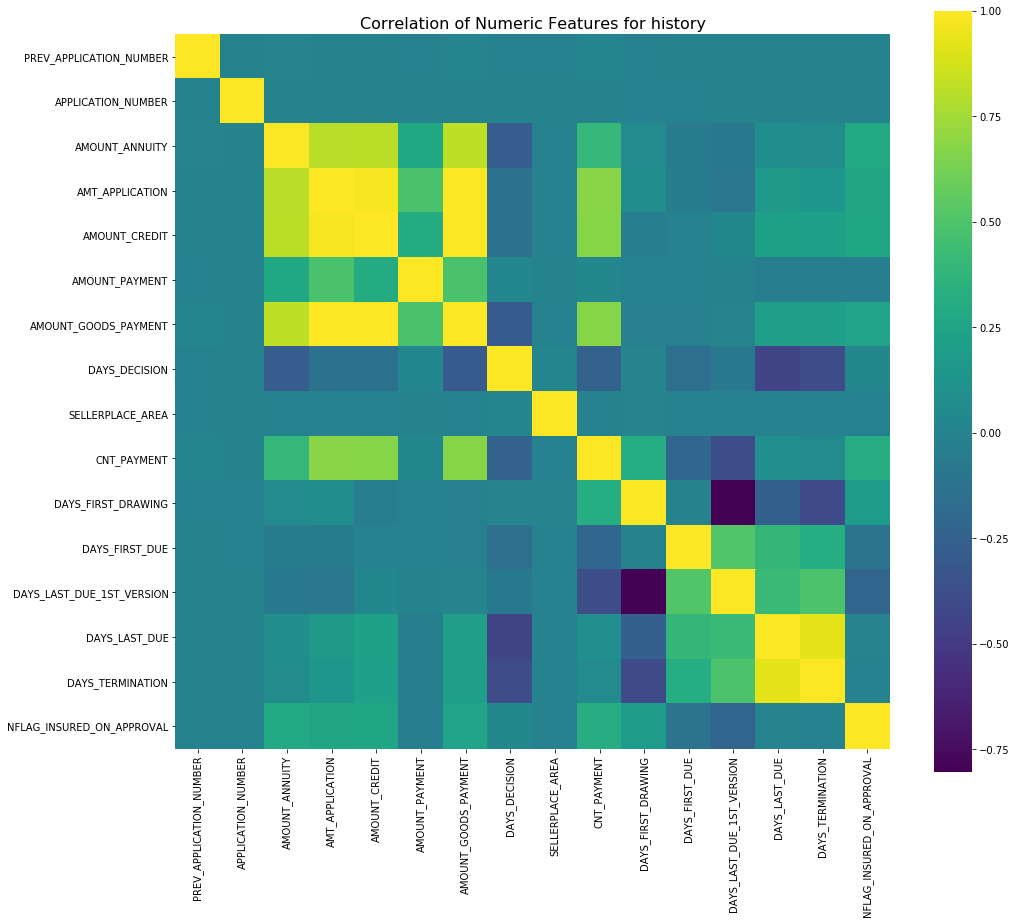

In [7]:
correlation = history.select_dtypes(exclude='object').corr()

fig, axes = plt.subplots(figsize = (16,14))
plt.title("Correlation of Numeric Features for history", y=1, size=16)
sns.heatmap(correlation, square=True, cmap="viridis")

### BKI

In [11]:
bki.head()

,application_number,bureau_id,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,123538884,5223613,Active,currency 1,718.0,0,377.0,NaN,19386.81,0,675000.00,320265.495,0.0,0.0,Consumer credit,39.0,NaN
1,123436670,6207544,Closed,currency 1,696.0,0,511.0,511.0,0.00,0,93111.66,0.000,0.0,0.0,Consumer credit,505.0,NaN
2,123589020,6326395,Closed,currency 1,165.0,0,149.0,160.0,NaN,0,36000.00,0.000,0.0,0.0,Consumer credit,150.0,0.0
3,123494590,6606618,Active,currency 1,55.0,0,310.0,NaN,NaN,0,38664.00,37858.500,NaN,0.0,Consumer credit,15.0,NaN
4,123446603,5046832,Active,currency 1,358.0,0,35.0,NaN,NaN,0,67500.00,0.000,0.0,0.0,Credit card,116.0,NaN


In [12]:
bki.select_dtypes(include='object')

,credit_active,credit_currency,credit_type
0,Active,currency 1,Consumer credit
1,Closed,currency 1,Consumer credit
2,Closed,currency 1,Consumer credit
3,Active,currency 1,Consumer credit
4,Active,currency 1,Credit card
...,...,...,...
945229,Closed,currency 1,Consumer credit
945230,Active,currency 1,Consumer credit
945231,Closed,currency 1,Consumer credit
945232,Active,currency 1,Credit card


In [6]:
bki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945234 entries, 0 to 945233
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   APPLICATION_NUMBER      945234 non-null  int64  
 1   BUREAU_ID               945234 non-null  int64  
 2   CREDIT_ACTIVE           945234 non-null  object 
 3   CREDIT_CURRENCY         945234 non-null  object 
 4   DAYS_CREDIT             945234 non-null  float64
 5   CREDIT_DAY_OVERDUE      945234 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     886797 non-null  float64
 7   DAYS_ENDDATE_FACT       596274 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  326557 non-null  float64
 9   CNT_CREDIT_PROLONG      945234 non-null  int64  
 10  AMT_CREDIT_SUM          945229 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     803483 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    619267 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  945234 non-null  float64
 14  CREDIT_TYPE         

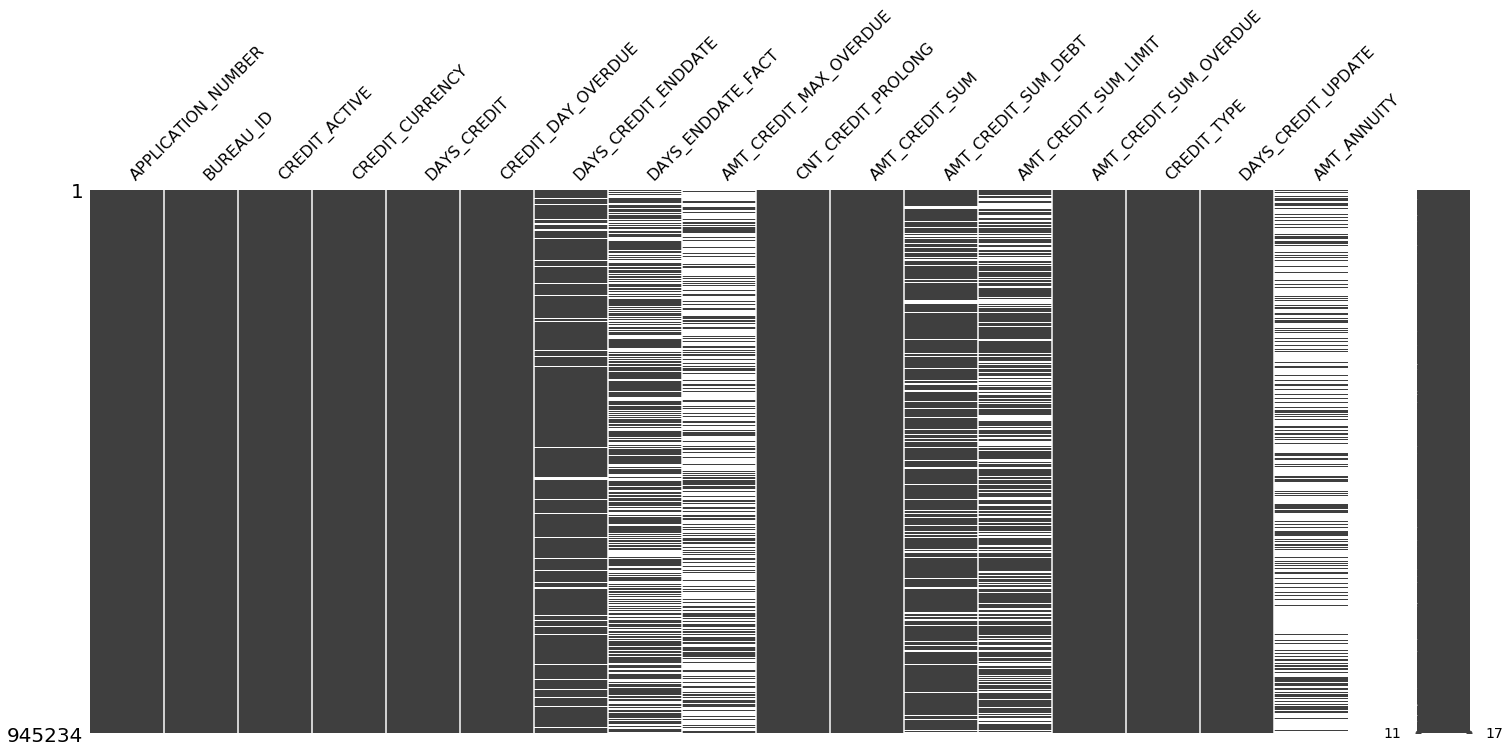

In [9]:
msno.matrix(bki);

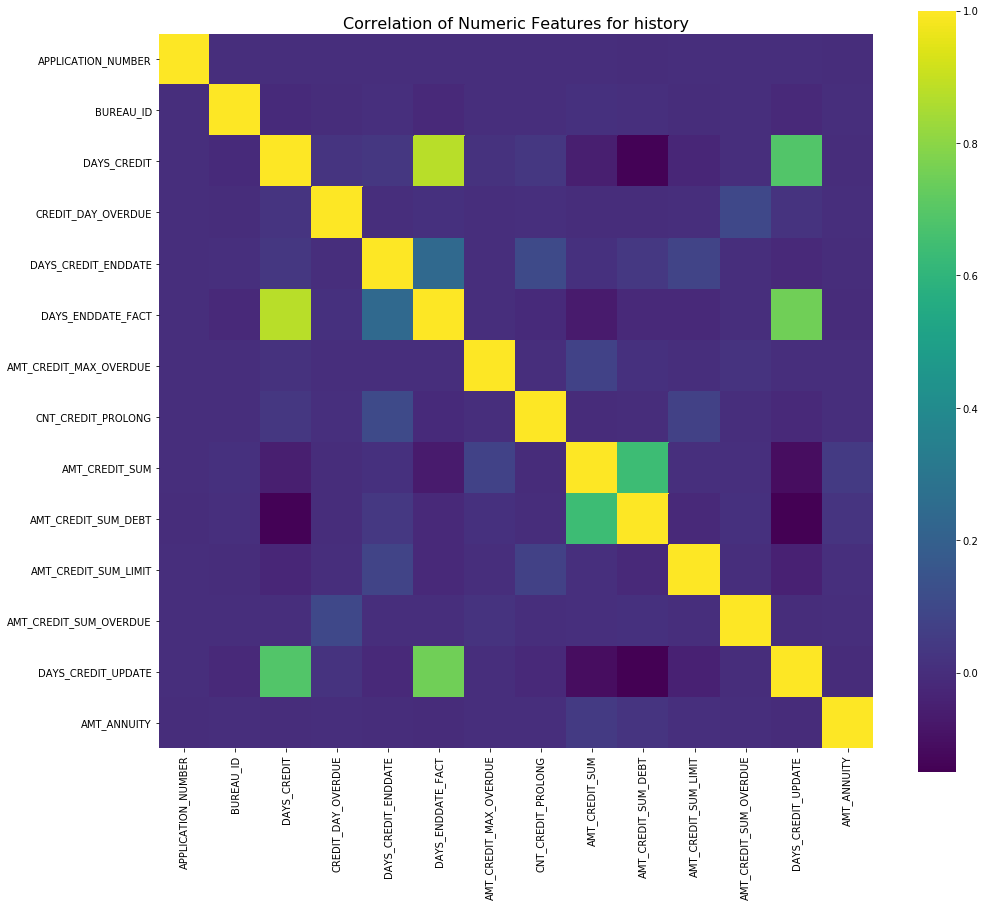

In [8]:
correlation = bki.select_dtypes(exclude='object').corr()

fig, axes = plt.subplots(figsize = (16,14))
plt.title("Correlation of Numeric Features for history", y=1, size=16)
sns.heatmap(correlation, square=True, cmap="viridis")

### Client Profile

In [5]:
client_profile.head()

,application_number,gender,childrens,total_salary,amount_credit,amount_annuity,education_level,family_status,region_population,age,days_on_last_job,own_car_age,flag_phone,flag_email,family_size,external_scoring_rating_1,external_scoring_rating_2,external_scoring_rating_3,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,123666076,F,0,157500.0,270000.0,13500.0,Incomplete higher,Civil marriage,0.008068,8560,1549,NaN,1,0,2.0,0.329471,0.236315,0.678568,0.0,0.0,0.0,0.0,1.0,2.0
1,123423688,F,0,270000.0,536917.5,28467.0,Secondary / secondary special,Married,0.020246,23187,365243,NaN,0,0,2.0,NaN,0.442295,0.802745,0.0,0.0,0.0,0.0,1.0,1.0
2,123501780,M,1,427500.0,239850.0,23850.0,Incomplete higher,Married,0.072508,14387,326,18.0,0,0,3.0,0.409017,0.738159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123588799,M,0,112500.0,254700.0,17149.5,Secondary / secondary special,Married,0.019101,14273,1726,12.0,0,0,2.0,NaN,0.308994,0.590233,0.0,0.0,0.0,0.0,0.0,3.0
4,123647485,M,0,130500.0,614574.0,19822.5,Lower secondary,Married,0.022625,22954,365243,NaN,0,0,2.0,NaN,0.739408,0.156640,0.0,0.0,1.0,0.0,0.0,6.0


In [6]:
client_profile.columns

Index(['application_number', 'gender', 'childrens', 'total_salary',
       'amount_credit', 'amount_annuity', 'education_level', 'family_status',
       'region_population', 'age', 'days_on_last_job', 'own_car_age',
       'flag_phone', 'flag_email', 'family_size', 'external_scoring_rating_1',
       'external_scoring_rating_2', 'external_scoring_rating_3',
       'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day',
       'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon',
       'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year'],
      dtype='object')

In [7]:
client_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          250000 non-null  int64  
 1   GENDER                      250000 non-null  object 
 2   CHILDRENS                   250000 non-null  int64  
 3   TOTAL_SALARY                250000 non-null  float64
 4   AMOUNT_CREDIT               250000 non-null  float64
 5   AMOUNT_ANNUITY              249989 non-null  float64
 6   EDUCATION_LEVEL             250000 non-null  object 
 7   FAMILY_STATUS               250000 non-null  object 
 8   REGION_POPULATION           250000 non-null  float64
 9   AGE                         250000 non-null  int64  
 10  DAYS_ON_LAST_JOB            250000 non-null  int64  
 11  OWN_CAR_AGE                 85041 non-null   float64
 12  FLAG_PHONE                  250000 non-null  int64  
 13  FLAG_EMAIL    

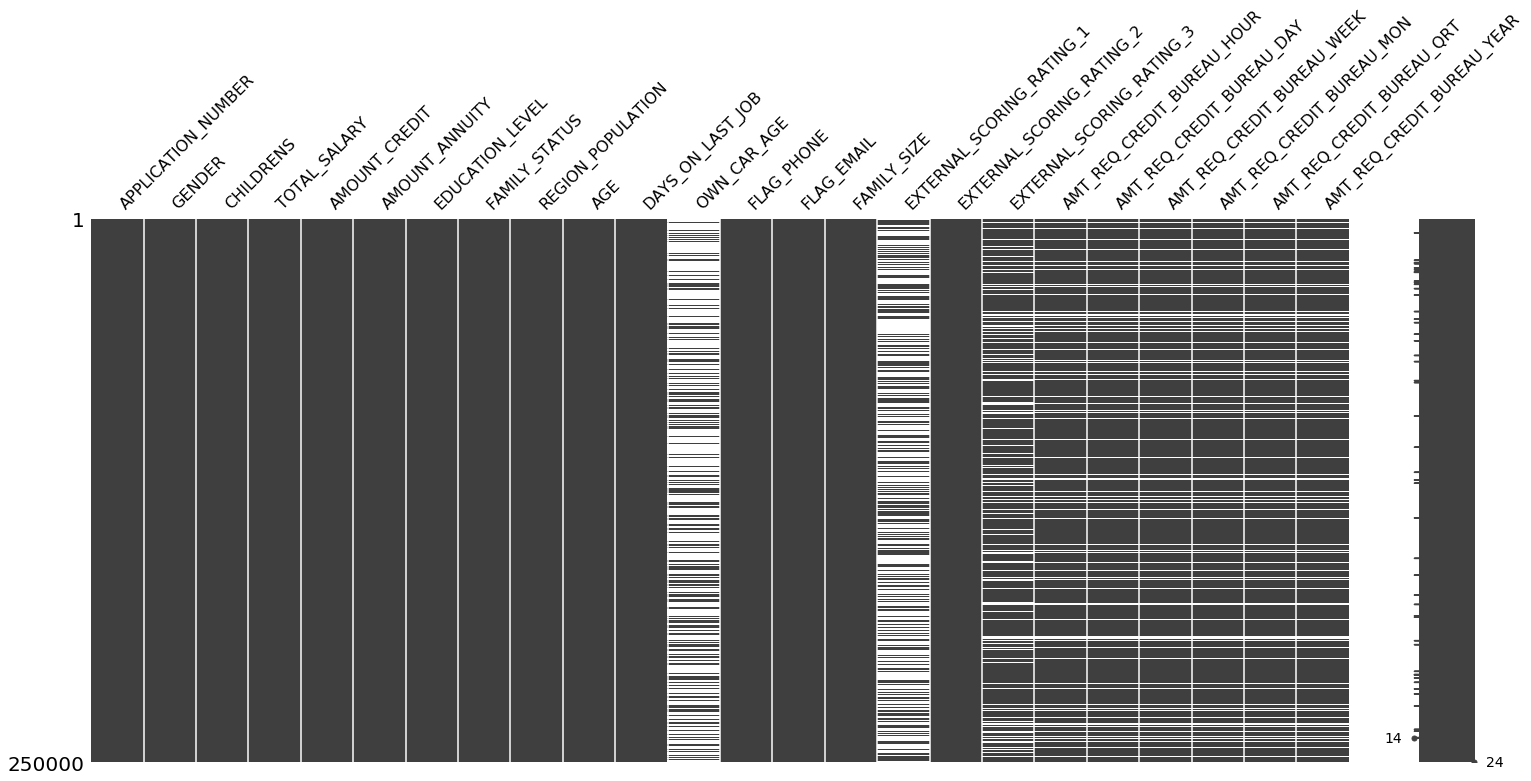

In [8]:
msno.matrix(client_profile);

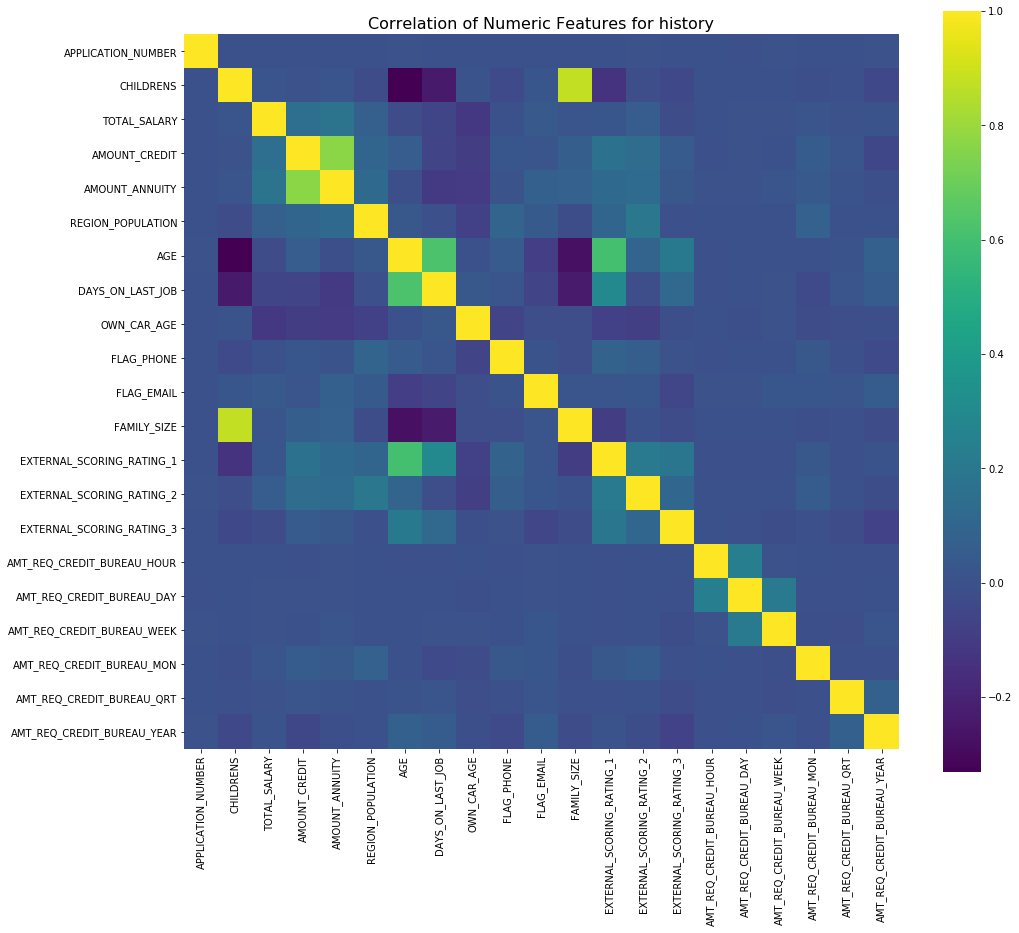

In [17]:
correlation = client_profile.select_dtypes(exclude='object').corr()

fig, axes = plt.subplots(figsize = (16,14))
plt.title("Correlation of Numeric Features for history", y=1, size=16)
sns.heatmap(correlation, square=True, cmap="viridis")

In [ ]:
sns.kdeplot()

In [23]:
client_profile.index

RangeIndex(start=0, stop=250000, step=1)

### Payments

In [9]:
payments.head()

,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,49011181,123664960,1.0,5,1002.0,1015.0,12156.615,12156.615
1,48683432,123497205,1.0,13,442.0,432.0,18392.535,10047.645
2,48652024,123749925,1.0,10,8.0,23.0,5499.945,5499.945
3,48398897,123550846,0.0,82,398.0,398.0,7082.145,7082.145
4,49867197,123562174,0.0,63,1359.0,1359.0,156.735,156.735


In [10]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023932 entries, 0 to 1023931
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PREV_APPLICATION_NUMBER  1023932 non-null  int64  
 1   APPLICATION_NUMBER       1023932 non-null  int64  
 2   NUM_INSTALMENT_VERSION   1023932 non-null  float64
 3   NUM_INSTALMENT_NUMBER    1023932 non-null  int64  
 4   DAYS_INSTALMENT          1023932 non-null  float64
 5   DAYS_ENTRY_PAYMENT       1023729 non-null  float64
 6   AMT_INSTALMENT           1023932 non-null  float64
 7   AMT_PAYMENT              1023729 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 62.5 MB


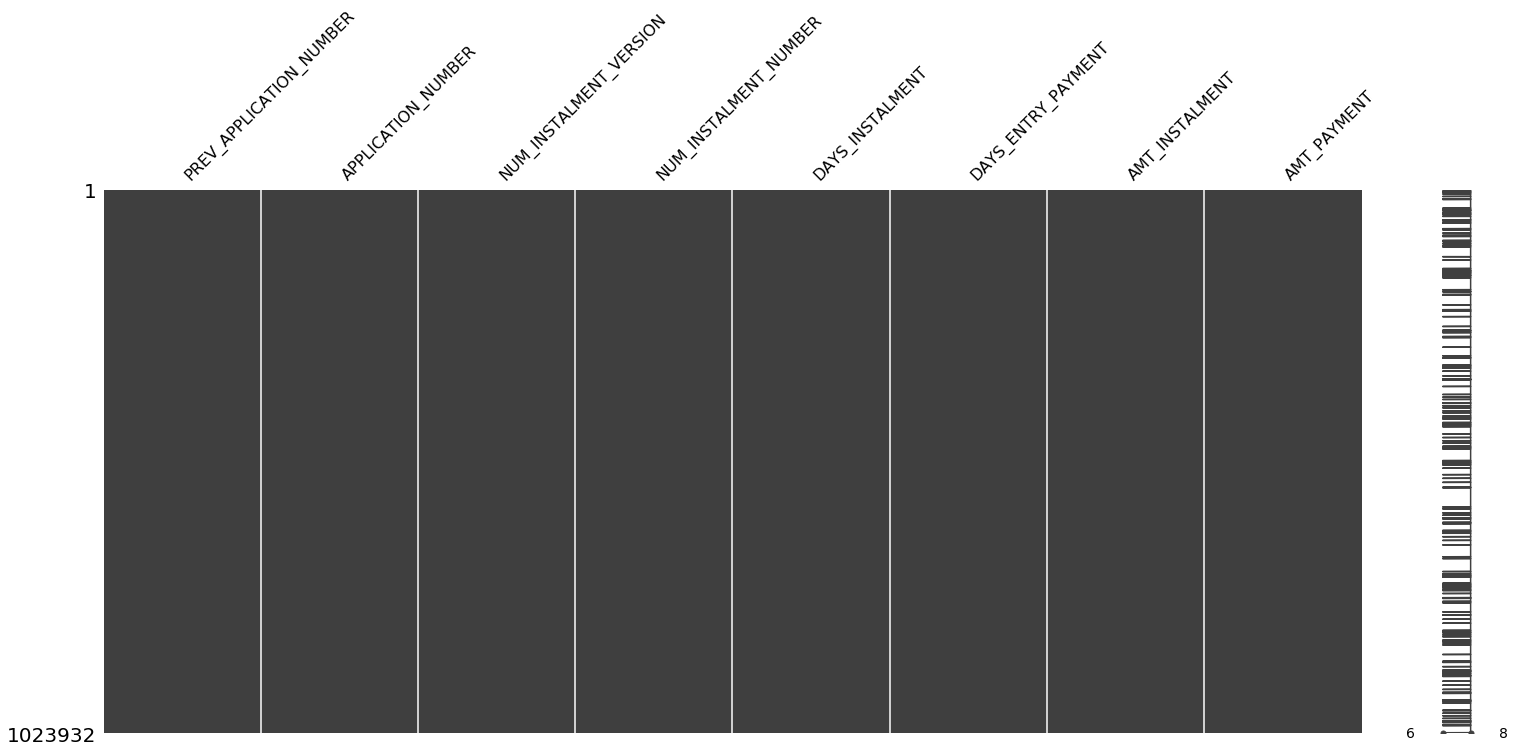

In [10]:
msno.matrix(payments);

## Merged data

In [38]:
data_copy = data.copy()
mask = data_copy["target"].isnull()
train, test = data_copy.loc[~mask], data_copy.loc[mask]    


In [92]:
train.head()

,application_number,target,name_contract_type,gender,childrens,total_salary,amount_credit,amount_annuity,education_level,family_status,region_population,age,days_on_last_job,own_car_age,flag_phone,flag_email,family_size,external_scoring_rating_1,external_scoring_rating_2,external_scoring_rating_3,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,bki_requests_count,bki_kurtosis,mean_scoring_sum,external_scoring_prod,external_scoring_weighted,external_scoring_rating_min,external_scoring_rating_max,external_scoring_rating_mean,external_scoring_rating_nanmedian,ratio_credit_to_annuity,ratio_annuity_to_salary,ratio_credit_to_salary,ratio_credit_to_age,age_to_total_salary,age_log_to_total_salary,ratio_salary_to_region_population,ratio_car_to_experience,ratio_car_to_age,expected_total_loss_1,expected_total_loss_2,expected_total_loss_3,expected_monthly_loss_1,expected_monthly_loss_2,expected_monthly_loss_3,expected_total_mean_loss,expected_monthly_mean_loss,education_level_total_salary_exp_mean,education_level_amount_credit_exp_mean,family_status_total_salary_exp_mean,family_status_amount_credit_exp_mean,gender_external_scoring_rating_2_exp_mean,education_level_external_scoring_rating_2_exp_mean,family_status_external_scoring_rating_2_exp_mean,gender_external_scoring_rating_mean_exp_mean,education_level_external_scoring_rating_mean_exp_mean,family_status_external_scoring_rating_mean_exp_mean,amt_req_credit_bureau_agg_ALT,amt_payment_mean,amt_payment_kurtosis,days_entry_to_instalment_rate_mean,amt_payment_to_instalment_diff_mean,amt_payment_to_instalment_rate_mean,days_to_amt_instalment_mean,days_to_amt_instalment_std,days_to_amt_payment_mean,days_to_amt_payment_std
0,123687442,0.0,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.716570,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.428571,0.687756,0.324353,4.181407,0.645914,0.716570,0.687756,0.700784,34.025788,0.159543,5.428571,54.361648,0.099860,0.000061,3008.4075,0.006399,0.000699,599170.547652,552256.266546,612667.559305,17609.307043,16230.521013,18005.977111,588031.457834,17281.935056,154658.252421,571786.707156,170430.477707,640813.957997,0.511497,0.501088,0.519873,0.491363,0.503352,0.515481,3.0,3960.37125,-0.924031,1.002418,-2315.55375,-0.249582,0.559390,0.331839,61.337534,121.363038
1,123597908,1.0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349.90000,-3.000000,1.015556,0.00000,0.000000,0.039648,NaN,0.040265,NaN
2,123526683,0.0,Cash,F,0.0,135000.0,1006920.0,42660.0,Higher education,Married,0.026392,21557.0,3618.0,NaN,1.0,0.0,2.0,NaN,0.682149,0.267869,0.0,0.0,0.0,7.0,0.0,4.0,11.0,0.539379,NaN,NaN,NaN,0.267869,0.682149,0.475009,0.475009,23.603376,0.316000,7.458667,46.709653,0.159681,0.000074,3562.9200,NaN,NaN,NaN,686869.876357,269722.588880,NaN,29100.493510,11427.288803,NaN,NaN,209285.934293,689939.678558,171491.632371,642072.924908,0.515023,0.555780,0.519314,0.518798,0.536334,0.515296,11.0,20169.47250,-0.899563,1.005526,0.00000,0.000000,0.234911,0.221721,0.235024,0.221915
3,123710391,1.0,Cash,M,0.0,180000.0,518562.0,22972.5,Secondary / secondary special,Married,0.031329,22338.0,NaN,NaN,0.0,0.0,2.0,NaN,0.171299,0.170446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.170446,0.171299,0.170873,0.170873,22.573164,0.127625,2.880900,23.214343,0.124100,0.000056,5639.2200,NaN,NaN,NaN,88829.188848,88386.882459,NaN,3935.167908,3915.573562,NaN,NaN,154458.743848,569789.583557,170749.459663,639795.941786,0.511629,0.500206,0.518508,0.491687,0.502666,0.514405,0.0,2450.11500,-3.000000,1.005969,0.00000,0.000000,0.752210,NaN,0.756699,NaN
4,123590329,1.0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

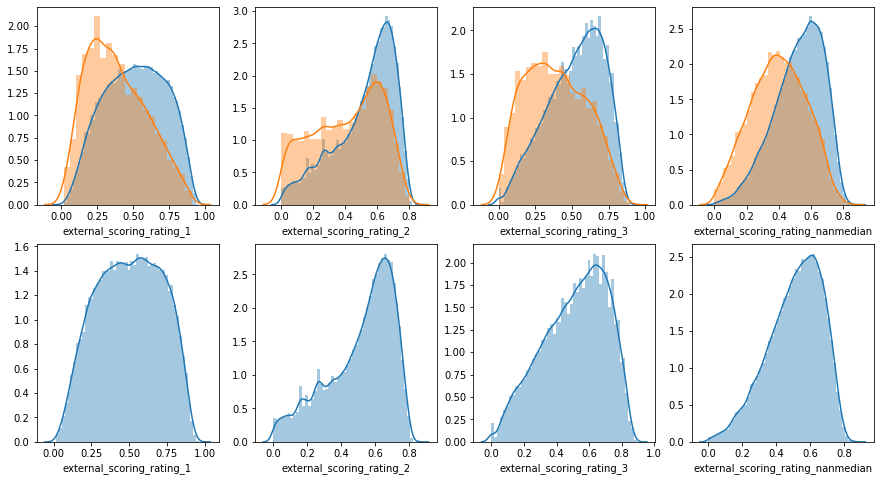

In [95]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, feature in enumerate(['external_scoring_rating_1',
                             'external_scoring_rating_2',
                             'external_scoring_rating_3',
                             'external_scoring_rating_nanmedian']):
    sns.distplot(train.loc[train['target']==0, feature], ax=axes[0, i], label='target = 0')
    sns.distplot(train.loc[train['target']==1, feature], ax=axes[0, i], label='target = 1')
    sns.distplot(test[feature], ax=axes[1, i], label='test (no target)')

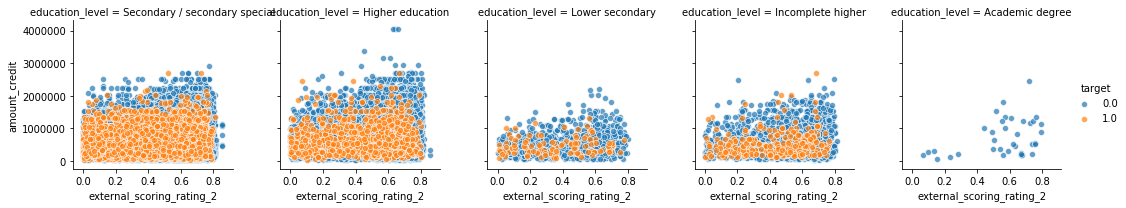

In [73]:
g = sns.FacetGrid(data, col="education_level", hue="target")
g.map(sns.scatterplot, "external_scoring_rating_2", "amount_credit", alpha=.7)
g.add_legend();

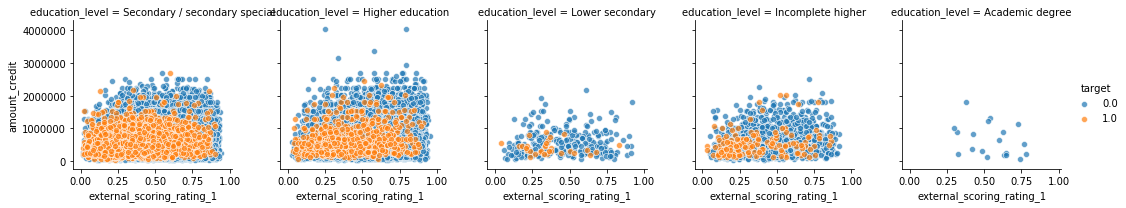

In [99]:
g = sns.FacetGrid(data, col="education_level", hue="target")
g.map(sns.scatterplot, "external_scoring_rating_1", "amount_credit", alpha=.7)
g.add_legend();

In [70]:
data.head(2)

,application_number,target,name_contract_type,gender,childrens,total_salary,amount_credit,amount_annuity,education_level,family_status,region_population,age,days_on_last_job,own_car_age,flag_phone,flag_email,family_size,external_scoring_rating_1,external_scoring_rating_2,external_scoring_rating_3,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,bki_requests_count,bki_kurtosis,mean_scoring_sum,external_scoring_prod,external_scoring_weighted,external_scoring_rating_min,external_scoring_rating_max,external_scoring_rating_mean,external_scoring_rating_nanmedian,ratio_credit_to_annuity,ratio_annuity_to_salary,ratio_credit_to_salary,ratio_credit_to_age,age_to_total_salary,age_log_to_total_salary,ratio_salary_to_region_population,ratio_car_to_experience,ratio_car_to_age,expected_total_loss_1,expected_total_loss_2,expected_total_loss_3,expected_monthly_loss_1,expected_monthly_loss_2,expected_monthly_loss_3,expected_total_mean_loss,expected_monthly_mean_loss,education_level_total_salary_exp_mean,education_level_amount_credit_exp_mean,family_status_total_salary_exp_mean,family_status_amount_credit_exp_mean,gender_external_scoring_rating_2_exp_mean,education_level_external_scoring_rating_2_exp_mean,family_status_external_scoring_rating_2_exp_mean,gender_external_scoring_rating_mean_exp_mean,education_level_external_scoring_rating_mean_exp_mean,family_status_external_scoring_rating_mean_exp_mean,amt_req_credit_bureau_agg_ALT,amt_payment_mean,amt_payment_kurtosis,days_entry_to_instalment_rate_mean,amt_payment_to_instalment_diff_mean,amt_payment_to_instalment_rate_mean,days_to_amt_instalment_mean,days_to_amt_instalment_std,days_to_amt_payment_mean,days_to_amt_payment_std
0,123687442,0.0,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.428571,0.687756,0.324353,4.181407,0.645914,0.71657,0.687756,0.700784,34.025788,0.159543,5.428571,54.361648,0.09986,0.000061,3008.4075,0.006399,0.000699,599170.547652,552256.266546,612667.559305,17609.307043,16230.521013,18005.977111,588031.457834,17281.935056,154658.252421,571786.707156,170430.477707,640813.957997,0.511497,0.501088,0.519873,0.491363,0.503352,0.515481,3.0,3960.37125,-0.924031,1.002418,-2315.55375,-0.249582,0.559390,0.331839,61.337534,121.363038
1,123597908,1.0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349.90000,-3.000000,1.015556,0.00000,0.000000,0.039648,NaN,0.040265,NaN


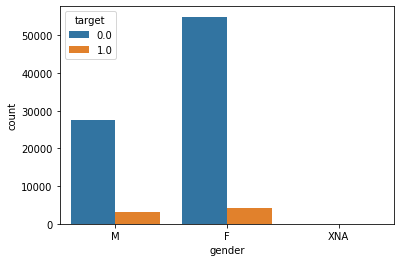

In [115]:
sns.countplot(x='gender', hue='target', data=train)

In [56]:
def plot_distributions(df,
                       continuous_feature,
                       target_feats=TARGET_50_FEATS,
                       mode='Train'
                      ):
    
    """Plots distribution histogramms for chosen feats"""

    r_size = 5
    c_size = len(target_feats) // r_size + 1
    
    print(mode +' features distribution')
    fig = plt.figure(figsize=(16, r_size*4))

    for num, feature in enumerate(continuous_feature):
        ax = fig.add_subplot(r_size, c_size, num+1)
        data = df[feature].copy()
        ax.set_title(feature, fontsize=12)
        if feature in target_feats:
            ax.hist(data, bins=25, color="red")
        else:
            ax.hist(data, bins=25, color="blue")

    fig.tight_layout()
    plt.show()
    
    
def plot_compare_distributions(train_df,
                               test_df,
                               features):
    
    """
    Вывод графиков сравнительного распределения train/test целевой переменной
    в зависимости от выбранных категорий
    """
    
    r_size = 3
    c_size = len(features) // r_size + 1

    fig = plt.figure(figsize=(16, c_size * 4))

    for num, feature in enumerate(features):
        try:
            train_data, test_data = train_df[feature].copy(), test_df[feature].copy()
            ax = fig.add_subplot(c_size, r_size, num+1)
            sns.kdeplot(train_data, ax=ax, color="blue", label="train")
            sns.kdeplot(test_data, ax=ax, color="green", label="test")

        except RuntimeError:
            pass
        except KeyError:
            train_data = train[feature].copy()
            sns.kdeplot(train_data, ax=ax, color="blue", label="train")
        ax.set_title(feature, fontsize=14)
        fig.tight_layout()

In [50]:
51 // 5 + 1

11

In [30]:
train.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE_x,BUREAU_ID,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT_x,AMOUNT_ANNUITY_x,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_APPLICATION_NUMBER_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,PREV_APPLICATION_NUMBER_y,NAME_CONTRACT_TYPE_y,AMOUNT_ANNUITY_y,AMT_APPLICATION,AMOUNT_CREDIT_y,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,123687442,0,Cash,5640206.0,Closed,currency 1,2562.0,0.0,2197.0,2162.0,4714.425,0.0,56362.5,0.0,0.0,0.0,Consumer credit,2162.0,NaN,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0,49796018.0,1.0,4.0,2830.0,2830.0,3289.635,3289.635,49915814.0,NaN,6510.015,71668.80,64500.3,7168.50,71668.80,Approved,240.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,20.0,12.0,middle,365243.0,143.0,187.0,365243.0,365243.0,0.0
1,123687442,0,Cash,5640206.0,Closed,currency 1,2562.0,0.0,2197.0,2162.0,4714.425,0.0,56362.5,0.0,0.0,0.0,Consumer credit,2162.0,NaN,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0,49796018.0,1.0,4.0,2830.0,2830.0,3289.635,3289.635,49713743.0,NaN,9262.215,72634.14,70758.0,7267.14,72634.14,Approved,2702.0,Non-cash from your account,XAP,Family,Repeater,Photo / Cinema Equipment,POS,XNA,90.0,10.0,high,365243.0,2671.0,2401.0,2401.0,2368.0,1.0
2,123687442,0,Cash,5640206.0,Closed,currency 1,2562.0,0.0,2197.0,2162.0,4714.425,0.0,56362.5,0.0,0.0,0.0,Consumer credit,2162.0,NaN,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0,49796018.0,1.0,4.0,2830.0,2830.0,3289.635,3289.635,49704707.0,NaN,7339.185,62058.60,67518.0,3.60,62058.60,Approved,721.0,Cash through the bank,XAP,NaN,Refreshed,Computers,POS,XNA,150.0,10.0,low_action,365243.0,690.0,420.0,420.0,415.0,0.0
3,123687442,0,Cash,5640206.0,Closed,currency 1,2562.0,0.0,2197.0,2162.0,4714.425,0.0,56362.5,0.0,0.0,0.0,Consumer credit,2162.0,NaN,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0,49796018.0,1.0,7.0,2740.0,2740.0,3289.635,3289.635,49915814.0,NaN,6510.015,71668.80,64500.3,7168.50,71668.80,Approved,240.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,20.0,12.0,middle,365243.0,143.0,187.0,365243.0,365243.0,0.0
4,123687442,0,Cash,5640206.0,Closed,currency 1,2562.0,0.0,2197.0,2162.0,4714.425,0.0,56362.5,0.0,0.0,0.0,Consumer credit,2162.0,NaN,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0,49796018.0,1.0,7.0,2740.0,2740.0,3289.635,3289.635,49713743.0,NaN,9262.215,72634.14,70758.0,7267.14,72634.14,Approved,2702.0,Non-cash from your account,XAP,Family,Repeater,Photo / Cinema Equipment,POS,XNA,90.0,10.0,high,365243.0,2671.0,24

In [37]:
len(NUMERICAL_FEATS)

56

Train features distribution


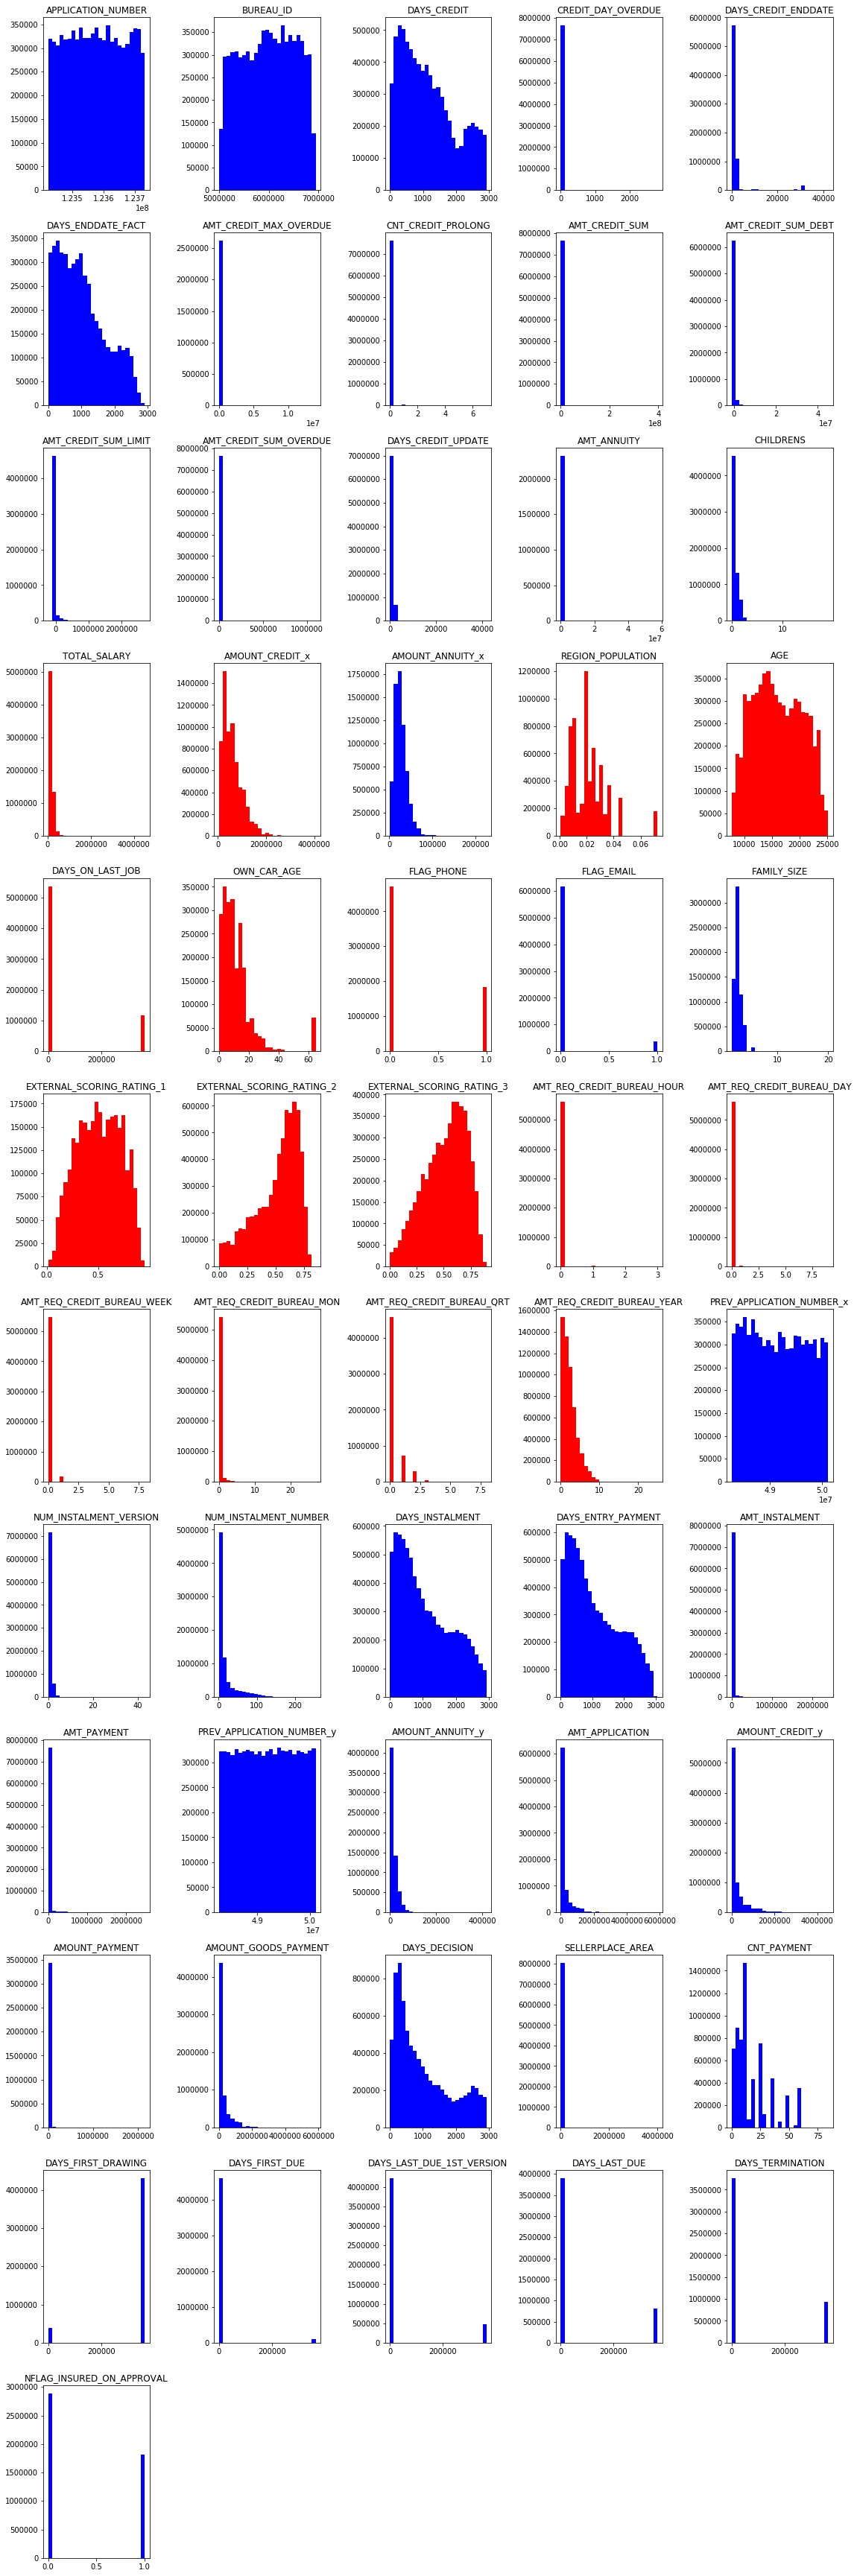

In [45]:
# Данные консистентны - Трейн и тест относятся к одному датасету
plot_distributions(train, NUMERICAL_FEATS, mode='Train')

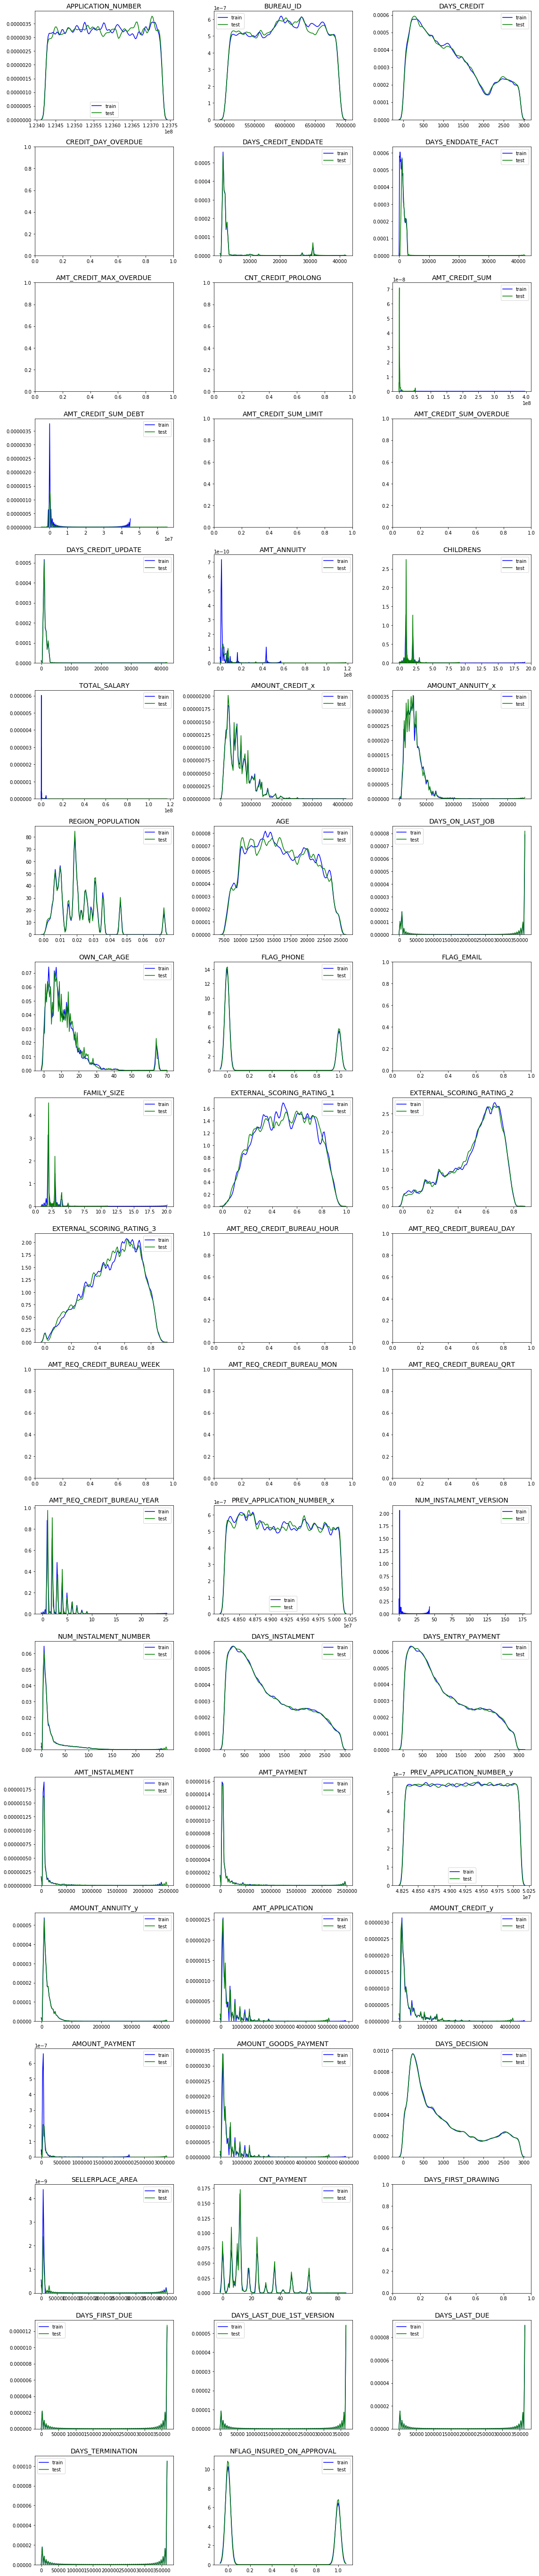

In [57]:
plot_compare_distributions(train, test, features=NUMERICAL_FEATS)

In [69]:
TARGET_6_FEATS = ['DAYS_ON_LAST_JOB', 'AGE', 'REGION_POPULATION',
                  'AMT_REQ_CREDIT_BUREAU_MON', 'FAMILY_SIZE', 'TOTAL_SALARY']

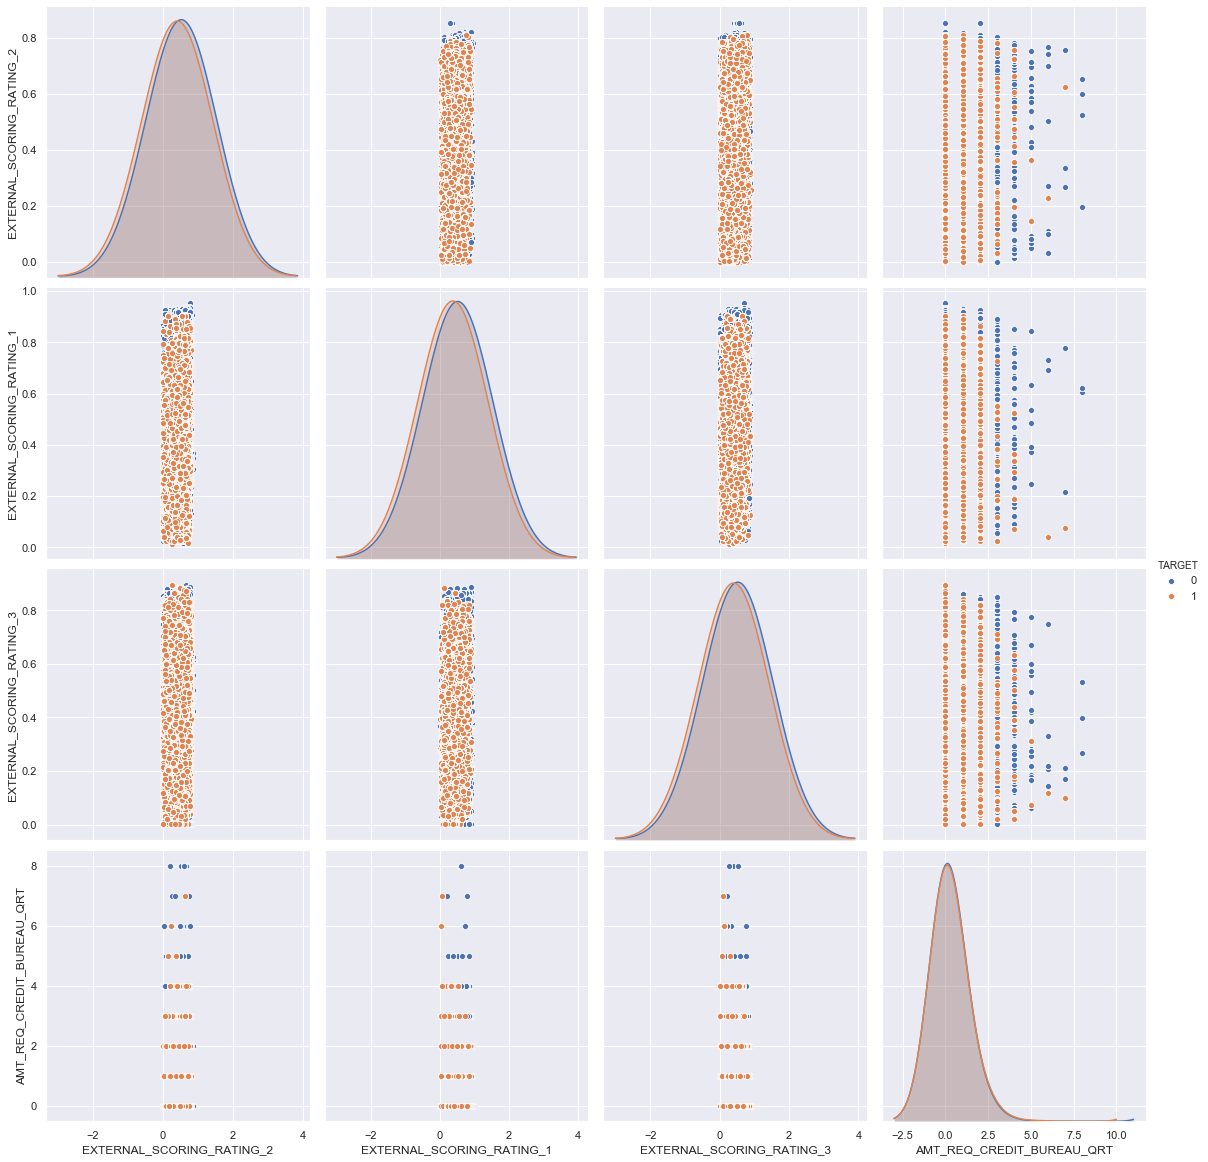

In [75]:
sns.set()
columns = [TARGET] + list(set(TARGET_10_FEATS) - set(TARGET_6_FEATS))

sns.pairplot(train[columns], height=4, kind="scatter", diag_kind="kde", diag_kws={'bw':'1.0'}, hue=TARGET)
plt.show()

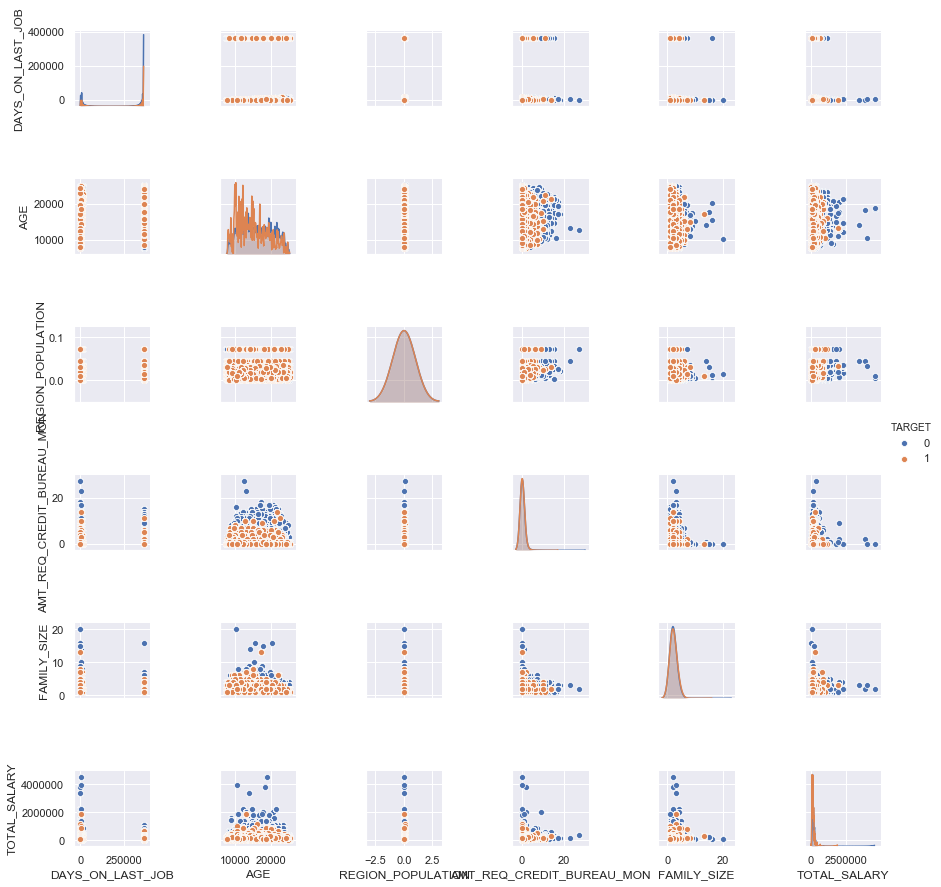

In [70]:
sns.set()
columns = [TARGET] + TARGET_6_FEATS

sns.pairplot(train[columns], height=2, kind="scatter", diag_kind="kde", diag_kws={'bw':'1.0'}, hue=TARGET)
plt.show()

 Оценка нелинейной зависимости от некоторых признаков

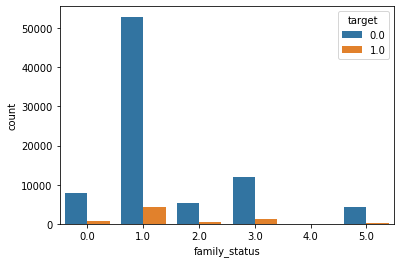

In [64]:

sns.countplot(train['family_status'], hue = target);
